# Brownian Motion

## 1. Background
- All the particles are in Brownian motion.
- All the particles move in 3-dimensions: x, y, and z

## 2. Rules
- All the particles move N_step step.
- All the particles located at (0, 0, 0).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
# N_particle : Number of Brownian particles
N_particle = 100

# N_step : Number of steps
N_step = 1000

# L : Length of each step
L = 1

In [3]:
# Save mean of MSD in MSD_log
MSD_log = list()
particles_pos = np.zeros((N_particle, 3), dtype=float)

for step in range(N_step):
    theta, psi = np.random.uniform(0, 2*np.pi, N_particle), np.random.uniform(0, 2*np.pi, N_particle)
    dx, dy, dz = L*np.cos(theta)*np.cos(psi), L*np.cos(theta)*np.sin(psi), L*np.sin(theta)
    particles_pos += np.array(np.vstack([dx, dy, dz]).T)
    mean_MSD = np.mean(np.sum(np.square(particles_pos), 1))
    MSD_log.append(mean_MSD)

In [4]:
# Get slope and bias
x = np.arange(1, N_step+1)
X = np.vstack([x, np.ones(N_step)]).T
y = np.array(MSD_log)

slope, bias = np.linalg.lstsq(X, y, rcond=None)[0]
print('Slope : {:.6f}, Bias : {:.6f}'.format(slope, bias))

Slope : 0.943245, Bias : -10.008890


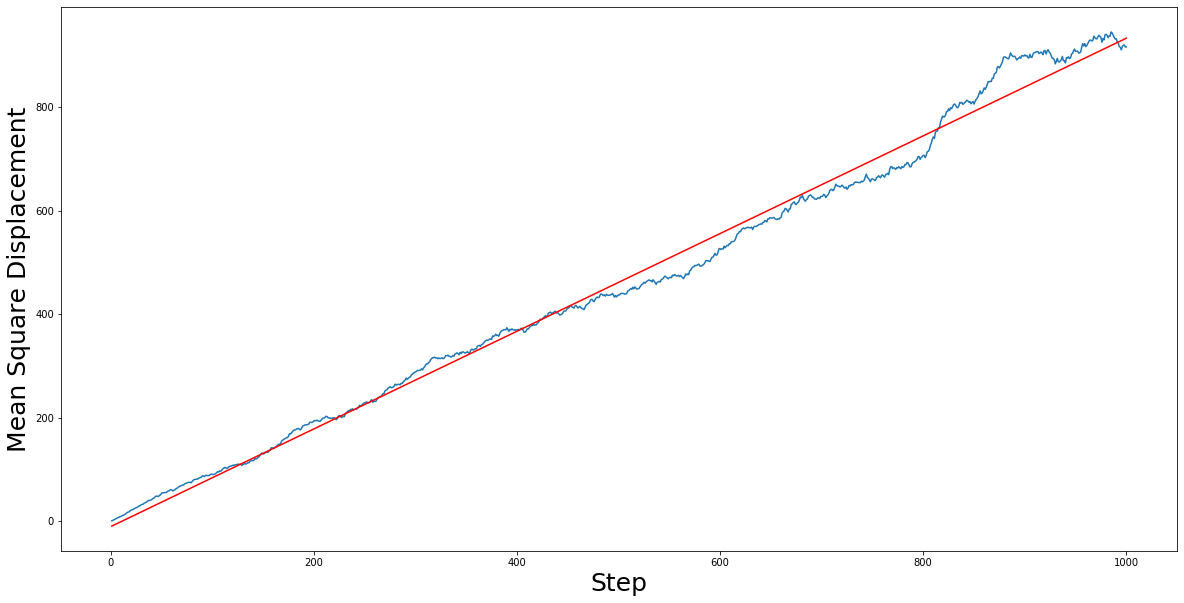

In [5]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.plot(x, slope*x + bias, 'r', label='Fitted line')
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Mean Square Displacement', fontsize=label_fontsize)
plt.show()

In [6]:
# Get slope with 0 bias
x = np.arange(1, N_step+1)
X = np.vstack([x, np.zeros(N_step)]).T
y = np.array(MSD_log)

slope, bias = np.linalg.lstsq(X, y, rcond=None)[0]
print('Slope : {:.6f}, Bias : {:.6f}'.format(slope, bias))

Slope : 0.928239, Bias : 0.000000


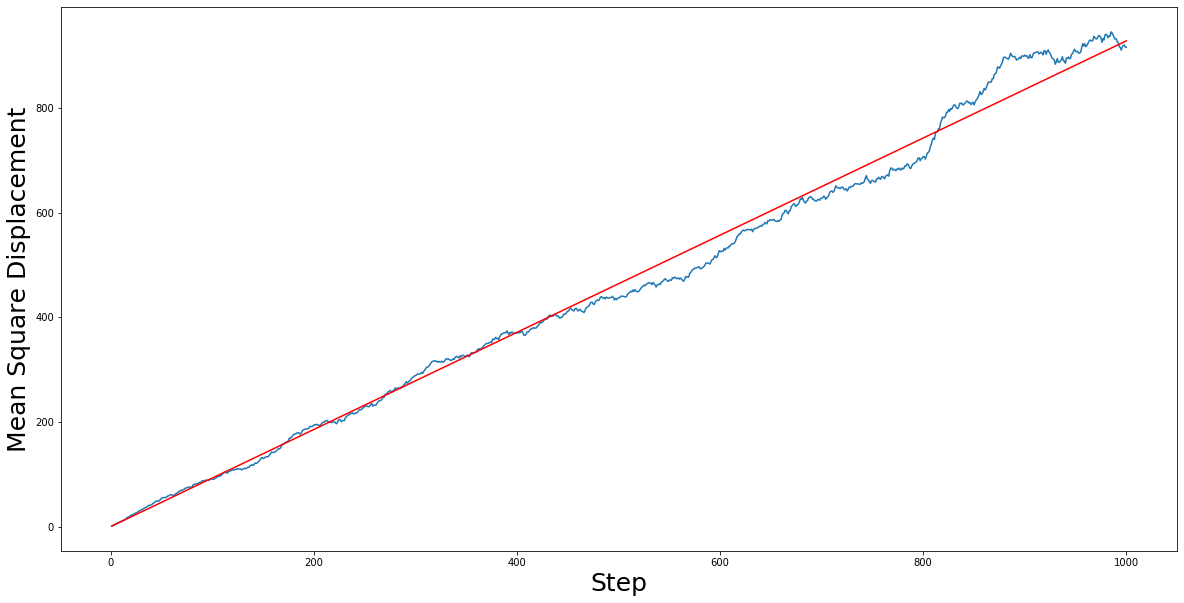

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.plot(x, slope*x + bias, 'r', label='Fitted line')
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Mean Square Displacement', fontsize=label_fontsize)
plt.show()